In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

img = load_img('533.jpg')
img_array = img_to_array(img)
print(img_array.shape)

# Load the image
img = load_img('533.jpg')

# Convert the image to a numpy array
img_array = img_to_array(img)

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(rotation_range=180)

# Expand the dimensions of the numpy array
img_array = np.expand_dims(img_array, axis=0)

# Generate random rotated images
aug_iter = datagen.flow(img_array)

# Display 9 different rotated images
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(5,5))

# Rotate the image 9 times
for ax in axs.flatten():
    augmented_image = next(aug_iter)[0].astype('uint8')
    # Save the image with a unique filename
    save_img(f'533_rotated_{ax}.jpg', augmented_image)
    ax.imshow(augmented_image)
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [61]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.05
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return  np.clip(noisy_array, 0.0, 1.0)

def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (48, 48))
    return array

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [62]:
img = Image.open("./533.jpg")

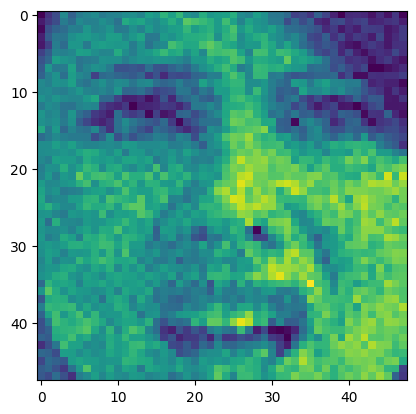

In [63]:
noise_img = noise(preprocess(np.asarray(img)))
plt.imshow(noise_img)

In [66]:
cv2.imwrite("533_noise.jpg", (noise_img*255).astype('int32'))

True